#### Importação dos Pacotes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importação dos Dados

In [3]:
path = '/media/matheus/HD/UFPR/2021/2º Semestre 2021/Estatística Econômica e Introdução à Econometria/1. Relatório Enade/2018/3.DADOS/microdados_enade_2018.txt'

In [4]:
enade = pd.read_csv(path, sep=';', encoding='latin-1', header=0, decimal=',') #importação

# Análise Exploratória

### Base total

In [5]:
print(f'Total de alunos aptos a realizar o enade em 2018: {enade.shape[0]}')
economia_total = enade[enade['CO_GRUPO']==13].shape[0]
print(f'Total de alunos de ECONOMIA aptos a realizar o enade em 2018: {economia_total}')
ufpr_total = enade[enade['CO_IES']==571].shape[0]
print(f'Total de alunos da UFPR aptos a realizar o enade em 2018: {ufpr_total}')
ufpr_economia = enade[(enade['CO_IES']==571)&(enade['CO_GRUPO']==13)].shape[0]
print(f'Total de alunos da UFPR de ECONOMIA aptos a realizar o enade em 2018: {ufpr_economia}')

Total de alunos aptos a realizar o enade em 2018: 548127
Total de alunos de ECONOMIA aptos a realizar o enade em 2018: 9582
Total de alunos da UFPR aptos a realizar o enade em 2018: 1072
Total de alunos da UFPR de ECONOMIA aptos a realizar o enade em 2018: 114


In [6]:
tipo_pres = enade.groupby('TP_PRES')[['TP_PRES']].count()
tipo_pres.index = ['Ausente','Eliminado por Participação Indevida','Ausente devido a dupla graduação','Presente com resultado válido','Presente com resultado desconsiderado']
print('Tipo de Presença')
tipo_pres

Tipo de Presença


,TP_PRES
Ausente,85221
Eliminado por Participação Indevida,138
Ausente devido a dupla graduação,524
Presente com resultado válido,462241
Presente com resultado desconsiderado,3


In [7]:
tipo_pres_economia = enade[enade['CO_GRUPO']==13].groupby('TP_PRES')[['TP_PRES']].count()
tipo_pres_economia.index = ['Ausente','Eliminado por Participação Indevida','Ausente devido a dupla graduação','Presente com resultado válido']
print('Tipo de Presença dos candidatos de ECONOMIA')
tipo_pres_economia

Tipo de Presença dos candidatos de ECONOMIA


,TP_PRES
Ausente,1497
Eliminado por Participação Indevida,2
Ausente devido a dupla graduação,8
Presente com resultado válido,8075


In [8]:
tipo_pres_ufpr = enade[enade['CO_IES']==571].groupby('TP_PRES')[['TP_PRES']].count()
tipo_pres_ufpr.index = ['Ausente','Presente com resultado válido']
print('Tipo de Presença dos candidatos da UFPR')
tipo_pres_ufpr

Tipo de Presença dos candidatos da UFPR


,TP_PRES
Ausente,105
Presente com resultado válido,967


In [9]:
tipo_pres_ufpr_econ = enade[(enade['CO_GRUPO']==13)&(enade['CO_IES']==571)].groupby('TP_PRES')[['TP_PRES']].count()
tipo_pres_ufpr_econ.index = ['Ausente','Presente com resultado válido']
print('Tipo de Presença dos candidatos da UFPR de ECONOMIA')
tipo_pres_ufpr_econ

Tipo de Presença dos candidatos da UFPR de ECONOMIA


,TP_PRES
Ausente,17
Presente com resultado válido,97


para as próximas análises, recomenda-se o uso do resultado de **candidatos presentes e com resultado válido**.

In [10]:
enade_pres_valida = enade[enade['TP_PRES']==555]

In [11]:
print(f'Dimensões da base de dados: {enade.shape}')
print(f'Dimensões da base de dados apenas com resultado válido: {enade_pres_valida.shape}')

Dimensões da base de dados: (548127, 137)
Dimensões da base de dados apenas com resultado válido: (462241, 137)


## Programas (EAD, PROUNI, PERMANÊNCIA)

### EAD

In [12]:
tipo_modalidade = enade_pres_valida.groupby('CO_MODALIDADE')[['CO_MODALIDADE']].count()
tipo_modalidade.index = ['Presencial','EAD']
print('Total de Alunos por Modalidade de Ensino:')
tipo_modalidade

Total de Alunos por Modalidade de Ensino:


,CO_MODALIDADE
Presencial,385137
EAD,77104


##### Nota Geral por Modalidade de Ensino

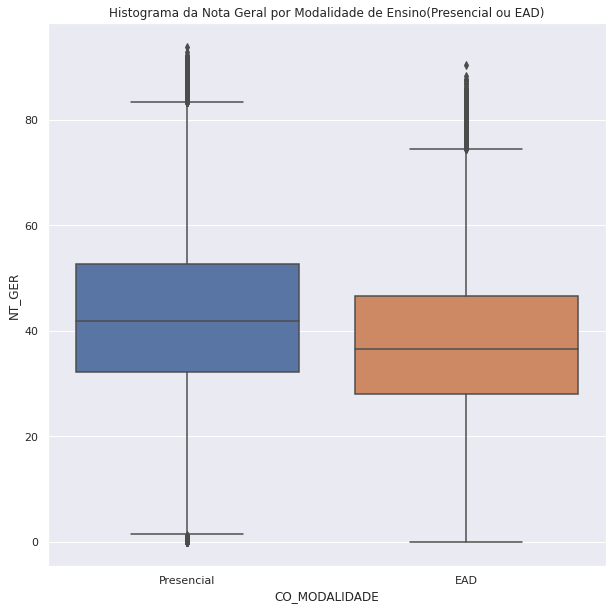

In [13]:
#cópia da base de presença válida com apenas nota e modalidade
modalidade_nota = enade_pres_valida[['CO_MODALIDADE','NT_GER']].copy()
#dicionário para substituição de valores pelo seu rótulo
dict_bolsa_estudo = {
    1:'Presencial',
    2:'EAD'
}
#função para substituição dos valores pelo seu rótulo
modalidade_nota['CO_MODALIDADE'] = modalidade_nota['CO_MODALIDADE'].map(dict_bolsa_estudo)
#cálculo da média por modalidade
modalidade_nota.groupby('CO_MODALIDADE')[['NT_GER']].mean()
#gráfico boxplot da média por modalidade
plt.figure(figsize=(10,10))
sns.set(style='darkgrid')
sns.boxplot(x='CO_MODALIDADE', y='NT_GER', data=modalidade_nota)
plt.title('Histograma da Nota Geral por Modalidade de Ensino(Presencial ou EAD)')
plt.show()

##### Descrição dos alunos e Alunas do EAD

In [14]:
alunos_ead = enade_pres_valida[enade_pres_valida['CO_MODALIDADE']==2]

In [15]:
#homens e mulheres
print('Quantidade Homens e Mulheres no EAD:')
print(alunos_ead.groupby('TP_SEXO')[['TP_SEXO']].count())
print('Percentual (Total: 77.104):')
print(alunos_ead.groupby('TP_SEXO')[['TP_SEXO']].count() / 77104)

Quantidade Homens e Mulheres no EAD:
         TP_SEXO
TP_SEXO         
F          46583
M          30521
Percentual (Total: 77.104):
          TP_SEXO
TP_SEXO          
F        0.604158
M        0.395842


In [16]:
#idade
idade_media_ead = alunos_ead['NU_IDADE'].mean()
print(f'Idade Média no EAD: {idade_media_ead :.0f} anos')
idade_media_mulher_ead = alunos_ead[alunos_ead['TP_SEXO']=='F']['NU_IDADE'].mean()
print(f'Idade Média de Mulheres no EAD: {idade_media_mulher_ead :.0f} anos')
idade_media_homem_ead = alunos_ead[alunos_ead['TP_SEXO']=='M']['NU_IDADE'].mean()
print(f'Idade Média de Homens no EAD: {idade_media_homem_ead :.0f} anos')

Idade Média no EAD: 34 anos
Idade Média de Mulheres no EAD: 34 anos
Idade Média de Homens no EAD: 35 anos


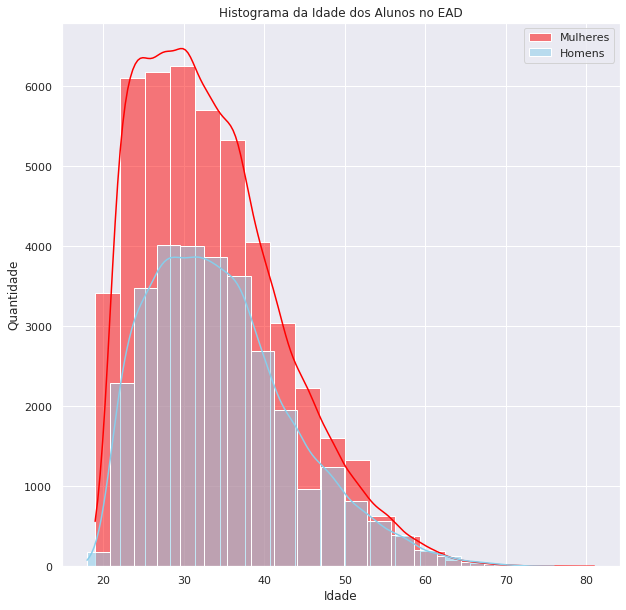

In [17]:
#Histograma da idade dos alunos no EAD por sexo
idade_mulheres_ead = alunos_ead[alunos_ead['TP_SEXO']=='F']['NU_IDADE']
idade_homens_ead = alunos_ead[alunos_ead['TP_SEXO']=='M']['NU_IDADE']
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.histplot(idade_mulheres_ead, bins=20, color='red', label='Mulheres', kde=True)
sns.histplot(idade_homens_ead, bins=20, color='skyblue', label='Homens', kde=True)
plt.title('Histograma da Idade dos Alunos no EAD')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.legend()
plt.show()

In [18]:
dict_renda = {
'A' : 'Até 1,5 salário mínimo',
'B' : 'De 1,5 a 3 salários mínimos',
'C' : 'De 3 a 4,5 salários mínimos',
'D' : 'De 4,5 a 6 salários mínimos',
'E' : 'De 6 a 10 salários mínimos',
'F' : 'De 10 a 30 salários mínimos',
'G' : 'Acima de 30 salários mínimos'
}
dict_renda2 = {
'A' : 1,
'B' : 2,
'C' : 3,
'D' : 4,
'E' : 5,
'F' : 6,
'G' : 7
}

In [19]:
['Até 1,5 salário mínimo',
'De 1,5 a 3 salários mínimos',
'De 3 a 4,5 salários mínimos',
'De 4,5 a 6 salários mínimos',
'De 6 a 10 salários mínimos',
'De 10 a 30 salários mínimos',
'Acima de 30 salários mínimos']

['Até 1,5 salário mínimo',
 'De 1,5 a 3 salários mínimos',
 'De 3 a 4,5 salários mínimos',
 'De 4,5 a 6 salários mínimos',
 'De 6 a 10 salários mínimos',
 'De 10 a 30 salários mínimos',
 'Acima de 30 salários mínimos']

In [20]:
#faixa de renda (QE_I08)
renda_sexo_ead = alunos_ead[['QE_I08','TP_SEXO']].copy()
renda_sexo_ead['QE_I08'] = renda_sexo_ead['QE_I08'].map(dict_renda)
print('Quantidade de Alunos por Faixa de Renda no EAD:')
print(renda_sexo_ead.groupby('QE_I08')[['QE_I08']].count())
print('Quantidade de Alunos por Sexo e Faixa de Renda no EAD:')
renda_sexo_ead.groupby(['TP_SEXO','QE_I08'])[['QE_I08']].count()


Quantidade de Alunos por Faixa de Renda no EAD:
                              QE_I08
QE_I08                              
Acima de 30 salários mínimos     324
Até 1,5 salário mínimo         14786
De 1,5 a 3 salários mínimos    23609
De 10 a 30 salários mínimos     3347
De 3 a 4,5 salários mínimos    18073
De 4,5 a 6 salários mínimos     8617
De 6 a 10 salários mínimos      7797
Quantidade de Alunos por Sexo e Faixa de Renda no EAD:


QE_I08
TP_SEXO QE_I08                              
F       Acima de 30 salários mínimos     112
        Até 1,5 salário mínimo         10623
        De 1,5 a 3 salários mínimos    15686
        De 10 a 30 salários mínimos     1273
        De 3 a 4,5 salários mínimos    10574
        De 4,5 a 6 salários mínimos     4403
        De 6 a 10 salários mínimos      3605
M       Acima de 30 salários mínimos     212
        Até 1,5 salário mínimo          4163
        De 1,5 a 3 salários mínimos     7923
        De 10 a 30 salários mínimos     2074
        De 3 a 4,5 salários mínimos     7499
        De 4,5 a 6 salários mínimos     4214
        De 6 a 10 salários mínimos      4192

In [21]:
from pySankey.sankey import sankey

In [22]:
renda_sexo_ead_sankey = renda_sexo_ead.dropna().copy()

<Figure size 1440x1440 with 0 Axes>

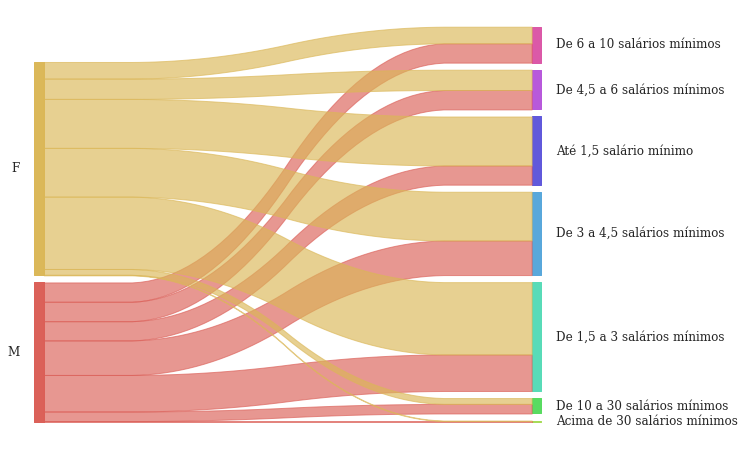

In [23]:
plt.figure(figsize=(20,20))
sankey(
    left=renda_sexo_ead_sankey["TP_SEXO"], right=renda_sexo_ead_sankey["QE_I08"],aspect=20, fontsize=12
)
# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(10, 8)

# Set the color of the background to white
fig.set_facecolor("w")
#arrumar a ordem dos rotulos do sankey


In [24]:
#bolsa?

In [25]:
dict_cursos = {
    1 : 'ADMINISTRAÇÃO',
    2 : 'DIREITO',
    13 : 'CIÊNCIAS ECONÔMICAS',
    18 : 'PSICOLOGIA',
    22 : 'CIÊNCIAS CONTÁBEIS',
    26 : 'DESIGN',
    29 : 'TURISMO',
    38 : 'SERVIÇO SOCIAL',
    67 : 'SECRETARIADO EXECUTIVO',
    81 : 'RELAÇÕES INTERNACIONAIS',
    83 : 'TECNOLOGIA EM DESIGN DE MODA',
    84 : 'TECNOLOGIA EM MARKETING',
    85 : 'TECNOLOGIA EM PROCESSOS GERENCIAIS',
    86 : 'TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS',
    87 : 'TECNOLOGIA EM GESTÃO FINANCEIRA',
    88 : 'TECNOLOGIA EM GASTRONOMIA',
    93 : 'TECNOLOGIA EM GESTÃO COMERCIAL',
    94 : 'TECNOLOGIA EM LOGÍSTICA',
    100 : 'ADMINISTRAÇÃO PÚBLICA',
    101 : 'TEOLOGIA',
    102 : 'TECNOLOGIA EM COMÉRCIO EXTERIOR',
    103 : 'TECNOLOGIA EM DESIGN DE INTERIORES',
    104 : 'TECNOLOGIA EM DESIGN GRÁFICO',
    105 : 'TECNOLOGIA EM GESTÃO DA QUALIDADE',
    106 : 'TECNOLOGIA EM GESTÃO PÚBLICA',
    803 : 'COMUNICAÇÃO SOCIAL - JORNALISMO',
    804 : 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA'
}

In [26]:
#qual curso possui mais alunos de ead?
curso_ead = alunos_ead.groupby('CO_GRUPO')[['CO_GRUPO']].count()
curso_ead.columns = ['Quantidade de Alunos']
curso_ead.reset_index(inplace=True)
curso_ead.columns = ['Curso','Quantidade de Alunos']
curso_ead['Curso'] = curso_ead['Curso'].map(dict_cursos)
print('Quantidade de alunos por curso no EAD:')
curso_ead.sort_values(by='Quantidade de Alunos', ascending=True, inplace=True) #trocar para false para aparecer a tabela



Quantidade de alunos por curso no EAD:


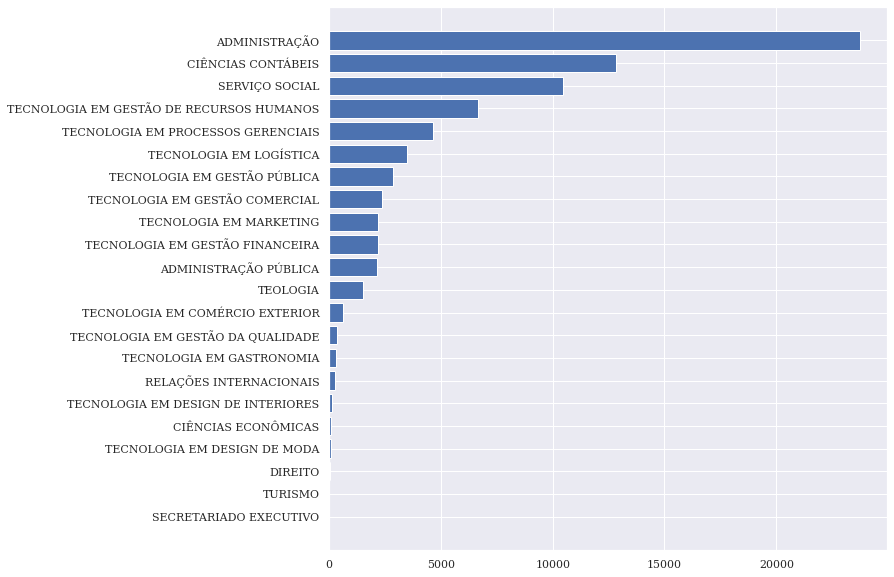

In [27]:
plt.figure(figsize=(10,10))
plt.barh(y=curso_ead['Curso'], width=curso_ead['Quantidade de Alunos']);


In [28]:
#qual curso possui mais alunos NO PRESENCIAL
alunos_presencial = enade_pres_valida[enade_pres_valida['CO_MODALIDADE']==1]
curso_presencial = alunos_presencial.groupby('CO_GRUPO')[['CO_GRUPO']].count()
curso_presencial.columns = ['Quantidade de Alunos']
curso_presencial.reset_index(inplace=True)
curso_presencial.columns = ['Curso','Quantidade de Alunos']
curso_presencial['Curso'] = curso_presencial['Curso'].map(dict_cursos)
print('Quantidade de alunos por curso no PRESENCIAL:')
curso_presencial.sort_values(by='Quantidade de Alunos', ascending=False, inplace=False) #trocar para false para aparecer a tabela



Quantidade de alunos por curso no PRESENCIAL:


,Curso,Quantidade de Alunos
1,DIREITO,127330
0,ADMINISTRAÇÃO,75858
4,CIÊNCIAS CONTÁBEIS,40034
3,PSICOLOGIA,37573
26,COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA,13982
13,TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS,12174
7,SERVIÇO SOCIAL,10919
25,COMUNICAÇÃO SOCIAL - JORNALISMO,9790
2,CIÊNCIAS ECONÔMICAS,7974
17,TECNOLOGIA EM LOGÍSTICA,6274


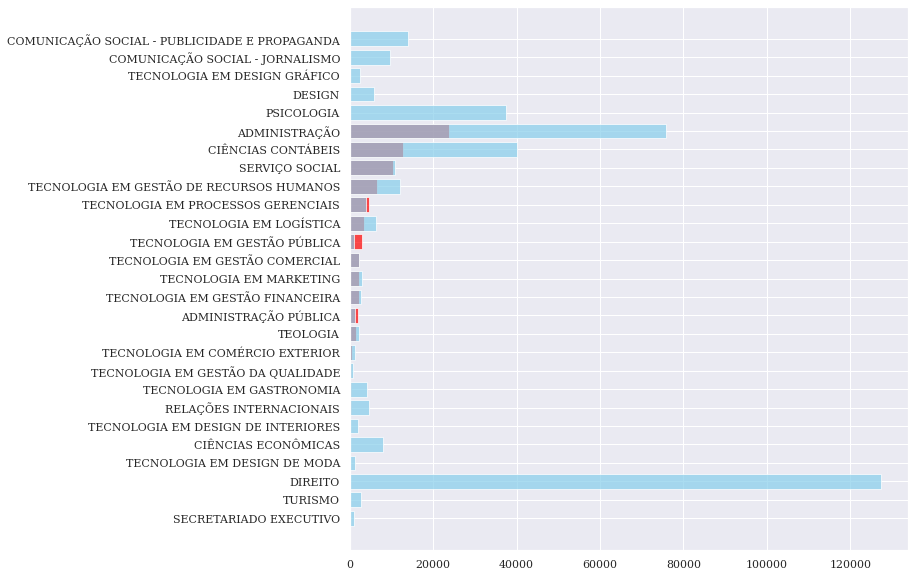

In [29]:
plt.figure(figsize=(10,10))
plt.barh(y=curso_ead['Curso'], width=curso_ead['Quantidade de Alunos'], color='red', alpha=0.7);
plt.barh(y=curso_presencial['Curso'], width=curso_presencial['Quantidade de Alunos'], color='skyblue',  alpha=0.7);

### Bolsa PROUNI

In [30]:
tipo_bolsa_estudo = enade_pres_valida.groupby('QE_I11')[['QE_I11']].count()
tipo_bolsa_estudo.index = [
'Nenhum, pois meu curso é gratuito',
'Nenhum, embora meu curso não seja gratuito',
'ProUni integral',
'ProUni parcial, apenas',
'FIES, apenas',
'ProUni Parcial e FIES',
'Bolsa oferecida por governo estadual, distrital ou municipal',
'Bolsa oferecida pela própria instituição',
'Bolsa oferecida por outra entidade (empresa, ONG, outra)',
'Financiamento oferecido pela própria instituição',
'Financiamento bancário']
print('Tipo de Bolsa de Estudo')
tipo_bolsa_estudo

Tipo de Bolsa de Estudo


,QE_I11
"Nenhum, pois meu curso é gratuito",71479
"Nenhum, embora meu curso não seja gratuito",165855
ProUni integral,40447
"ProUni parcial, apenas",10187
"FIES, apenas",85020
ProUni Parcial e FIES,5254
"Bolsa oferecida por governo estadual, distrital ou municipal",12531
Bolsa oferecida pela própria instituição,43136
"Bolsa oferecida por outra entidade (empresa, ONG, outra)",15241
Financiamento oferecido pela própria instituição,8033


In [31]:
tipo_bolsa_permanencia = enade_pres_valida.groupby('QE_I12')[['QE_I12']].count()
tipo_bolsa_permanencia.index = [
"Nenhum",
"Auxílio moradia",
"Auxílio alimentação",
"Auxílio moradia e alimentação",
"Auxílio Permanência",
"Outro tipo de auxílio"]
print('Tipo de Bolsa de Permanência')
tipo_bolsa_permanencia

Tipo de Bolsa de Permanência


,QE_I12
Nenhum,442995
Auxílio moradia,1407
Auxílio alimentação,3264
Auxílio moradia e alimentação,1499
Auxílio Permanência,3738
Outro tipo de auxílio,6804


Boxplot da nota do EAD vs Presencial

Joyplot da nota nota por categoria de bolsa

In [32]:
bolsa_nota = enade_pres_valida[['QE_I11','NT_GER']].copy()

In [33]:
dict_bolsa_estudo = {
    'A':'Nenhum, curso é gratuito.',
    'B':'Nenhum, curso não gratuito.',
    'C':'ProUni integral.',
    'D':'ProUni parcial, apenas.',
    'E':'FIES, apenas.',
    'F':'ProUni Parcial e FIES.',
    'G':'Bolsa oferecida por governo',
    'H':'Bolsa, própria instituição.',
    'I':'Bolsa, outra entidade.',
    'J':'Financiamento, própria instituição.',
    'K':'Financiamento bancário.'
}


In [34]:
bolsa_nota['QE_I11'] = bolsa_nota['QE_I11'].map(dict_bolsa_estudo)

In [35]:
bolsa_nota.dropna(inplace=True)

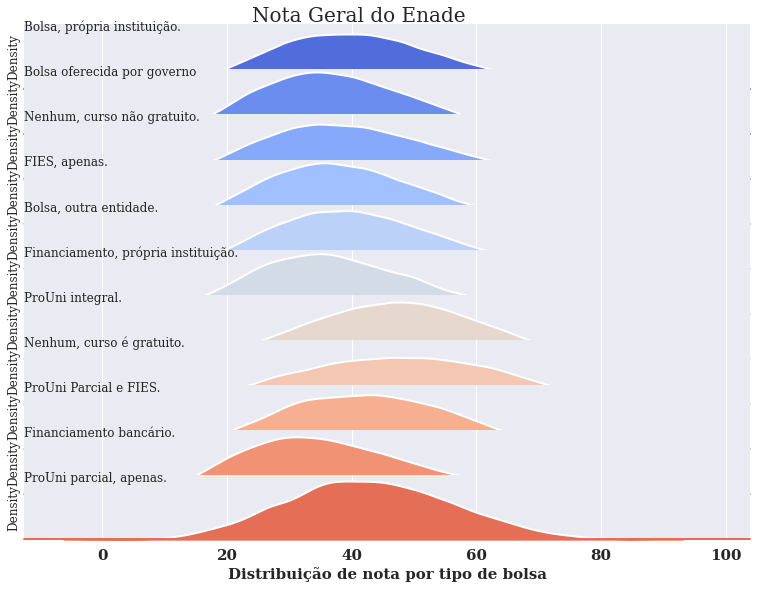

In [36]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(bolsa_nota, row='QE_I11', hue='QE_I11', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'NT_GER',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'NT_GER', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for ax, tipo in zip(g.axes.flat, bolsa_nota['QE_I11'].unique()):
    ax.text(0.0, 0.9, tipo,
            transform=ax.transAxes)
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Distribuição de nota por tipo de bolsa', fontweight='bold', fontsize=15)
g.fig.suptitle('Nota Geral do Enade',
               ha='center',
               fontsize=20,
               fontweight=20)

plt.show()

In [37]:
dict_categad = {
    118:'privada',
    120:'privada',
    121:'privada',
    10005:'privada',
    10006:'privada',
    10007:'privada',
    10008:'privada',
    10009:'privada',
    17634:'privada',
    93:'publico',
    115:'publico',
    116:'publico',
    10001:'publico',
    10002:'publico',
    10003:'publico'
}

In [38]:

uni_categad = enade_pres_valida[['CO_CATEGAD']].copy()
uni_categad['CO_CATEGAD'] = uni_categad['CO_CATEGAD'].map(dict_categad)
print('Quantidade de Alunos Presentes em Universidades Públicas e Privadas')
uni_categad.groupby('CO_CATEGAD')[['CO_CATEGAD']].count()


Quantidade de Alunos Presentes em Universidades Públicas e Privadas


,CO_CATEGAD
CO_CATEGAD,
privada,392957
publico,69284


próxima ideia de gráfico:

 - proporção do tipo de aluno que possui bolsa ou financiamento nas universidades privadas

## Regressão Logística

> procurar os instrumentos válidos para controlar a seleção para o programa escolhido

> Qual é o impacto então do EAD, PROUNI, BOLSA PERMANENCIA, ETC sobre o desempenho dos alunos?

In [39]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import graphviz as gr
from linearmodels.iv import IV2SLS

%matplotlib inline

pd.set_option("display.max_columns", 5)
style.use("fivethirtyeight")

In [40]:
enade_pres_valida

,NU_ANO,CO_IES,...,QE_I67,QE_I68
0,2018,1356,...,6.0,5.0
1,2018,1356,...,6.0,6.0
2,2018,1356,...,6.0,5.0
3,2018,1356,...,6.0,4.0
4,2018,1356,...,6.0,6.0
...,...,...,...,...,...
548112,2018,322,...,1.0,1.0
548114,2018,322,...,5.0,6.0
548115,2018,322,...,4.0,5.0
548117,2018,322,...,6.0,6.0


## The 1st Stage
Before we use quarter of birth as an instrument, we need to make sure it is a valid one. This implies arguing in favor of the two Instrumental Variables assumptions:

.<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>C</mi>
  <mi>o</mi>
  <mi>v</mi>
  <mo stretchy="false">(</mo>
  <mi>Z</mi>
  <mo>,</mo>
  <mi>T</mi>
  <mo stretchy="false">)</mo>
  <mo>&#x2260;</mo>
  <mn>0</mn>
</math>. This is saying that we should have a strong 1st stage, or that the instrument indeed impacts the treatment variable.

. <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>Y</mi>
  <mo>&#x22A5;</mo>
  <mi>Z</mi>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>T</mi>
</math>. This is the exclusion restriction, stating that the instrument Z only affects the outcome Y through the treatment T.

In [58]:
dados = enade_pres_valida[['QE_I07','QE_I08','QE_I11','NT_GER']].dropna()

In [42]:
dict_familia = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
    'H' : 8
}

dict_renda = {
    'A': 1431,
    'B': 2146.5,
    'C': 3577.5,
    'D': 5008,
    'E': 7632,
    'F': 19080,
    'G': 28620
}

bolsa_prouni = {
    'A' : 0,
    'B' : 0,
    'C' : 1,
    'D' : 1,
    'E' : 0,
    'F' : 1,
    'G' : 1,
    'H' : 1,
    'I' : 1,
    'J' : 0,
    'K' : 0,
}

In [59]:
dados['QE_I07'] = dados['QE_I07'].map(dict_familia)
dados['QE_I08'] = dados['QE_I08'].map(dict_renda)
dados['QE_I11'] = dados['QE_I11'].map(bolsa_prouni)

**renda per capita** calculada pelo *ponto média do intervalo de renda total* e dividido pela *quantidade de pessoas que residem com o candidato*

In [60]:
dados['renda_per_capita'] = dados['QE_I08']/dados['QE_I07']

In [61]:
dados['renda_per_capita'].describe()


count    459563.000000
mean       1816.310461
std        2640.679783
min         178.875000
25%         626.000000
50%        1073.250000
75%        1788.750000
max       28620.000000
Name: renda_per_capita, dtype: float64

In [62]:
dados[dados['renda_per_capita'] <= 1500].groupby('QE_I11')[['QE_I11']].count()

,QE_I11
QE_I11,
0,213747
1,98848


> Lembrete do que estou querendo analisar: os alunos que possuem bolsa de estudos e tem até 1500 reais de renda per capita, verificar o impacto da bolsa no desempenho do aluno no enade

In [55]:
dados['NT_GER'].fillna(0, inplace=True)

In [63]:
dados.isna().sum()

QE_I07              0
QE_I08              0
QE_I11              0
NT_GER              0
renda_per_capita    0
dtype: int64

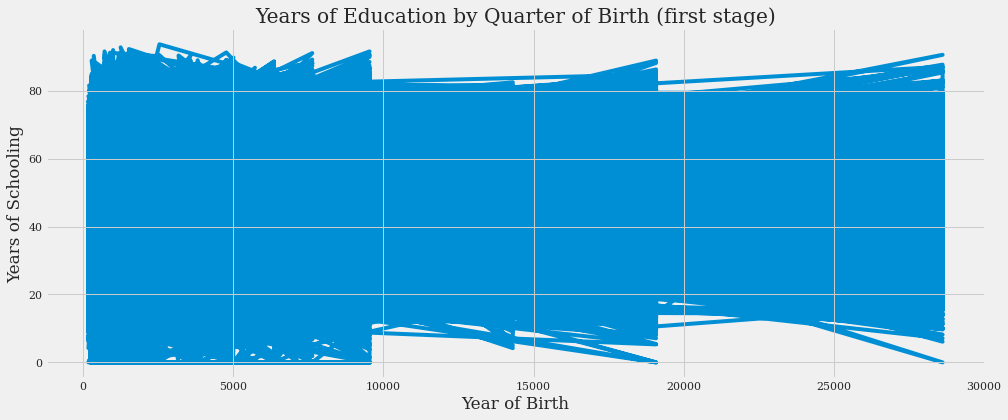

In [64]:
plt.figure(figsize=(15,6))
plt.plot(dados["renda_per_capita"], dados['NT_GER'], zorder=-1)
for q in range(1, 5):
    x = dados.query(f"renda_per_capita=={q}")["renda_per_capita"]
    y = dados.query(f"renda_per_capita=={q}")["NT_GER"]
    plt.scatter(x, y, marker="s", s=200, c=f"C{q}")
    plt.scatter(x, y, marker=f"${q}$", s=100, c=f"white")

plt.title("Years of Education by Quarter of Birth (first stage)")
plt.xlabel("Year of Birth")
plt.ylabel("Years of Schooling");

In [66]:
factor_data = dados.assign(**{f"q{int(q)}": (dados["renda_per_capita"] == q).astype(int)
                             for q in dados["renda_per_capita"].unique()})

factor_data.columns

Index(['QE_I07', 'QE_I08', 'QE_I11', 'NT_GER', 'renda_per_capita', 'q715',
       'q1252', 'q1526', 'q1908', 'q19080', 'q894', 'q429', 'q3577', 'q834',
       'q1192', 'q2146', 'q1001', 'q5724', 'q2504', 'q2544', 'q1431', 'q1669',
       'q536', 'q4770', 'q7632', 'q1272', 'q357', 'q511', 'q1788', 'q238',
       'q1073', 'q477', 'q3816', 'q6360', 'q5008', 'q204', 'q286', 'q268',
       'q178', 'q596', 'q14310', 'q2385', 'q9540', 'q1090', 'q447', 'q306',
       'q954', 'q626', 'q4088', 'q7155', 'q3180', 'q28620', 'q2725'],
      dtype='object')

In [68]:
first_stage = smf.ols("NT_GER ~ C(QE_I08) + C(QE_I07) + q1431", data=factor_data).fit()

print("q4 parameter estimate:, ", first_stage.params["q1431"])
print("q4 p-value:, ", first_stage.pvalues["q1431"])

q4 parameter estimate:,  0.3893461203005135
q4 p-value:,  0.0034748214465572186
